The SDSS Kaggle dataset represents 100,000 stellar objects observed by the Sloan Digital Sky Survey telescope, in which there are 17 attributes per observation and one classification variable that places the stellar object in one of 3 categories; Star, Galaxy, Quasar Object. We can use this data as a training set for classification models that would allow for the broad use of ML-applications on astronomical surveys. In these surveys, we can utilize these models as means of expediting the process of data collection and data mining for large yield surveys. This data represents the basic attributes required for classification of stellar objects. Models trained on this set can, through iterative processes be further refined into more concise classification models or a functional method of anomaly detection (objects with very low confidence).


# Data Loading/Cleaning


Importing relevant packages into the python environment

In [5]:
# import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from astropy.coordinates import SkyCoord
import astropy.units as u

In [7]:
df = pd.read_csv("data/star_classification.csv")

In [24]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Object Labels: 

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object (QSO))

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# Data Quality

With no missing values, each stellar object is completely fleshed out with it's respective attributes with very little anomalies. Of all the datapoints, there is one stellar object that is likely incorrect or had temporary values imputed to minimize missing values.

In [42]:
df.loc[df['u'] == -9999]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


Looking up this star's ID in the SDSS server, we can confirm that it was flagged for having highly suspect values for u, g, and z wavelengths. Using this foundation, we can confidently remove this point from the dataset, also considering that we have the flexibility of a very large surplus of data.

In [43]:
df = df.replace(to_replace=-9999.0, value = np.nan)

In [36]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,99999.000000,99999.000000,100000.000000,100000.000000,99999.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,22.080679,20.631583,19.645762,19.084854,18.768988,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,2.251068,2.037384,1.854760,1.757895,1.765982,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352410,18.965240,18.135828,17.732285,17.460830,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179140,21.099930,20.125290,19.405145,19.004600,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687480,22.123775,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


# Variable Analysis: 

Within this dataset there are a handful of key variables that we can identify as critical to our ability to classify the types of stellar objects.

Namely: <i> Wavelengthss, RA/Dec Coordinates, and Redshift </i>

<b> Wavelengths </b>

The letters <i> u, g, r, i, z </i> describe the specific slice of wavelengths that each object had it's apparent magnitude measured in by the SDSS telescope. Where: 

u- 355.1 nm (Ultraviolet)

g- 468.6 nm (Green)

r- 616.5 nm (Red)

i- 748.1 nm (Near Infrared)

z- 893.1 nm (Infrared)

These wavelengths are measured as apparent magnitudes, which operates with an inverse relationship with brightness. An object with a low apparent magnitude is much brighter than an object with a high magnitude. 

Some reference points on this apparent scale are: 

Sun = -26 

Full Moon = -12

Polaris = 2.5

<b> Right Ascension and Declination </b>

Labelled as Alpha and Delta, respectively, this coordinate system maps the celestial sphere around the Earth and can be visualized here: 

<center><img src="images/celestial-sphere.jpg"/></center>

<b> Redshift </b>

Redshift technically describes how much the wavelength of an object has been shifted towards a longer/redder wavelength, but for the scope of this analysis, Redshift can be synonymous with Distance from Us, and the analysis of the data should remain almost exactly the same.  


# Visualizations

<Axes: xlabel='class', ylabel='Count'>

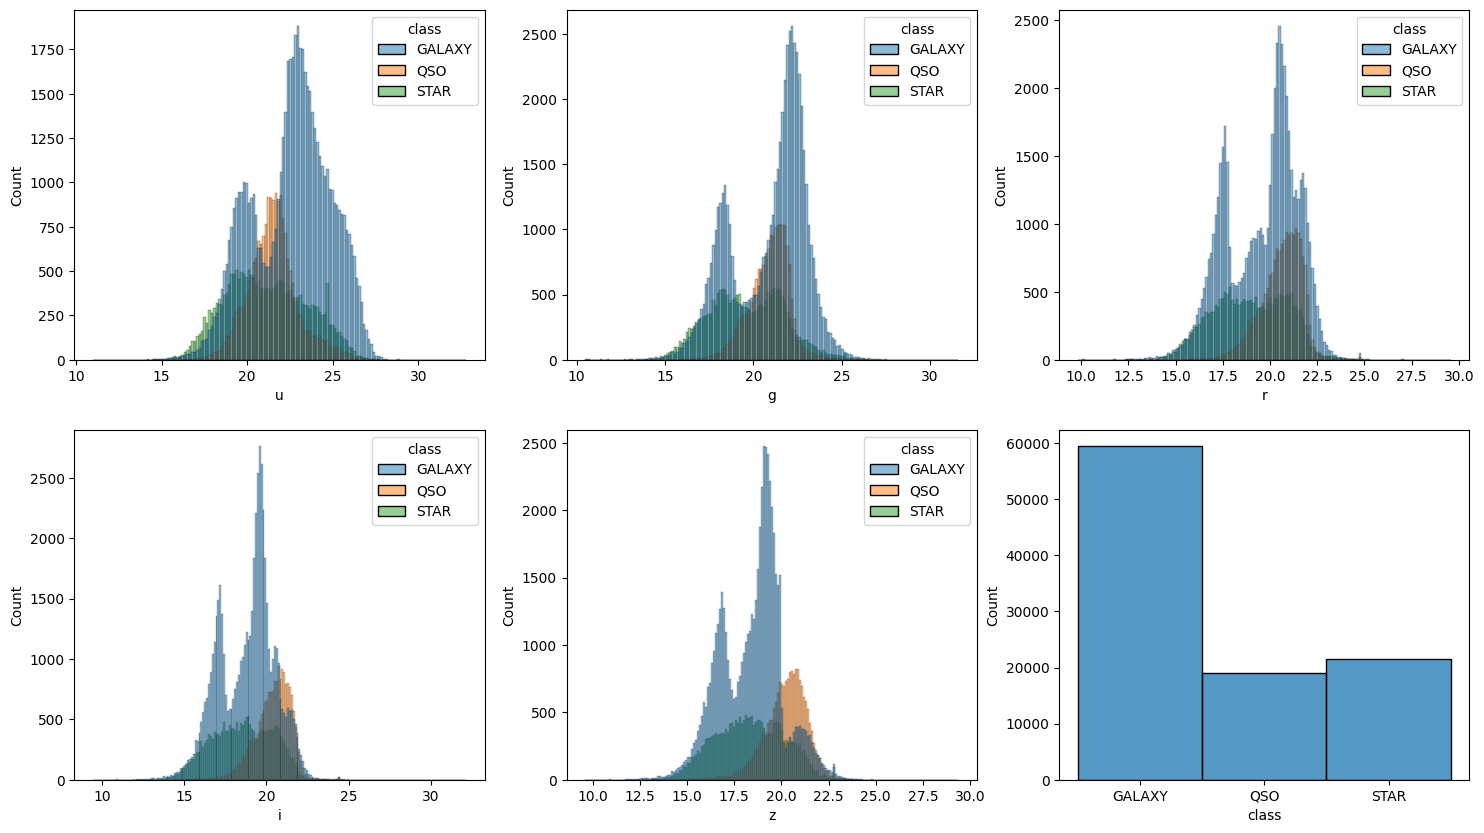

In [11]:
fig, axis = plt.subplots(2,3, figsize = (18,10))
sns.histplot(df, x = "u", hue= "class", ax= axis[0,0])
sns.histplot(df, x = "g", hue= "class", ax= axis[0,1])
sns.histplot(df, x = "r", hue= "class", ax= axis[0,2])
sns.histplot(df, x = "i", hue= "class", ax= axis[1,0])
sns.histplot(df, x = "z", hue= "class", ax= axis[1,1])
sns.histplot(df, x = "class", ax = axis[1,2])


We can see from the following plots that there is a large sample bias towards Galaxy classified objects, which might indicate that for a further analysis we might have to employ methods like undersampling to accurately build models on this set. 

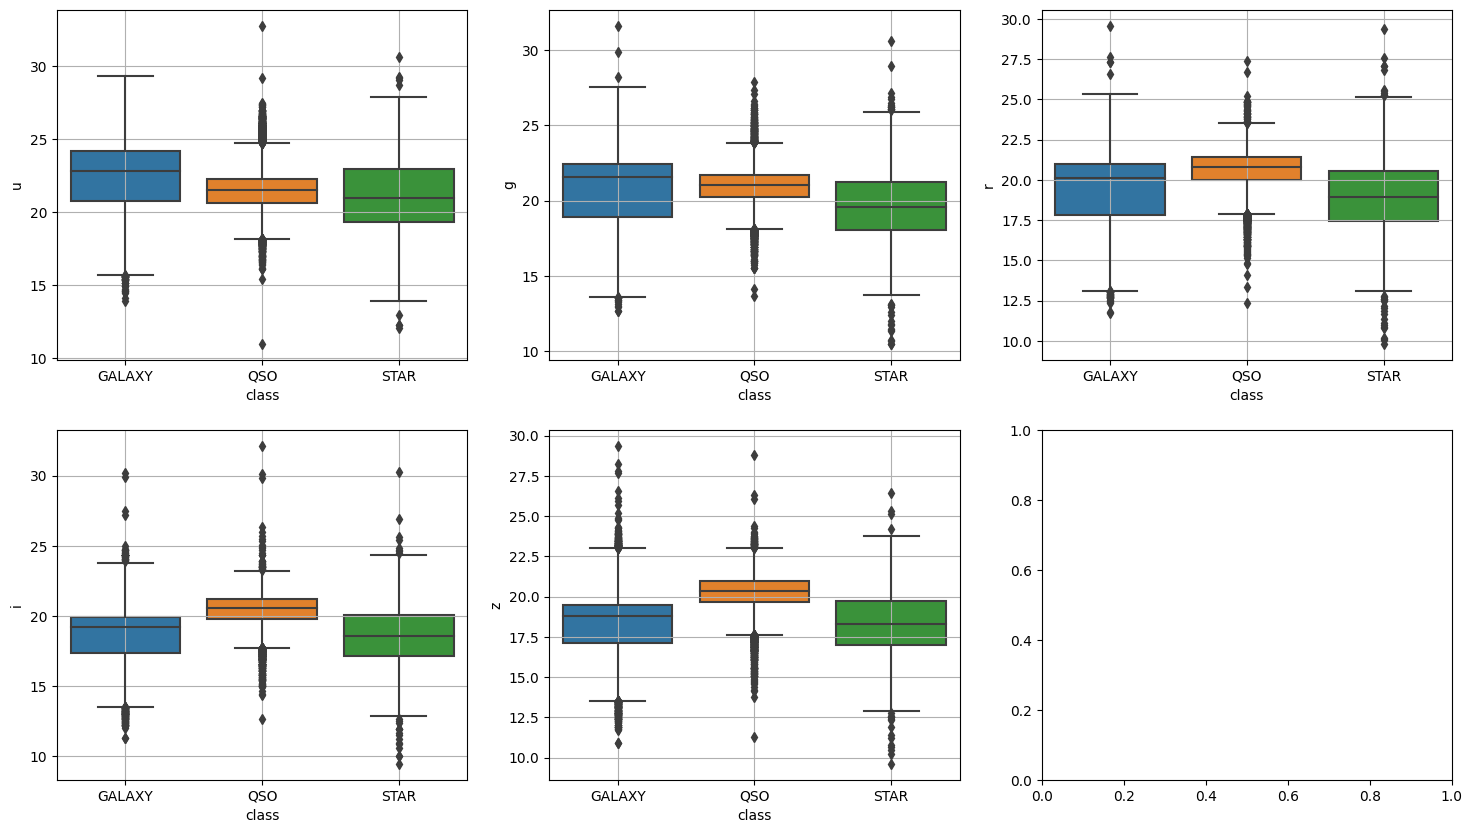

In [75]:
fig, axis = plt.subplots(2,3, figsize = (18,10))
sns.boxplot(df, x = "class", y = "u", ax= axis[0,0]).grid()
sns.boxplot(df, x = "class", y = "g", ax= axis[0,1]).grid()
sns.boxplot(df, x = "class", y = "r", ax= axis[0,2]).grid()
sns.boxplot(df, x = "class", y = "i", ax= axis[1,0]).grid()
sns.boxplot(df, x = "class", y = "z", ax= axis[1,1]).grid()

The box plots provide us some insight into the average magnitude within each wavelength for the stellar objects.

We can also analyze some of the correlations between each variable as follows;

<Axes: >

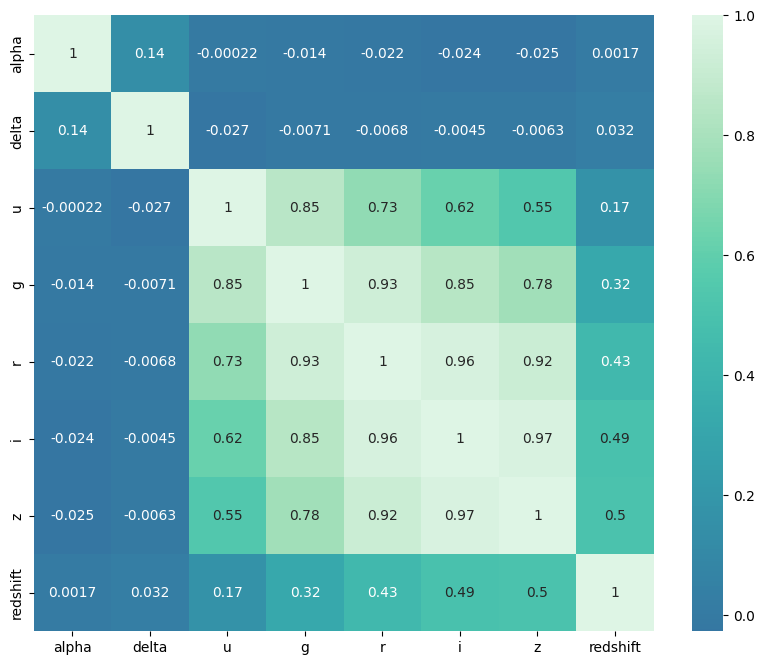

In [74]:
new_df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].copy()
new_df.head()
cor = new_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data = cor, annot = True, cmap = 'mako', center = 0)

Althought intuitive, we can see that the existance of each wavelength heavily correlates to nearby wavelengths on the electro-magnetic spectrum. That is, an object that has a high/low apparant magnitude in Z probably has a stronger correlation in I, compared to U being significantly further away on the EM-spectrum.

In [110]:
df['summed_wavelengths'] = -2.5 * np.log10(10**(-0.4*(df["u"])) + 10**(-0.4*(df["g"])) + 10**(-0.4*(df["r"])) + 10**(-0.4*(df["i"])) + 10**(-0.4*(df["z"])))

<Axes: xlabel='redshift', ylabel='Count'>

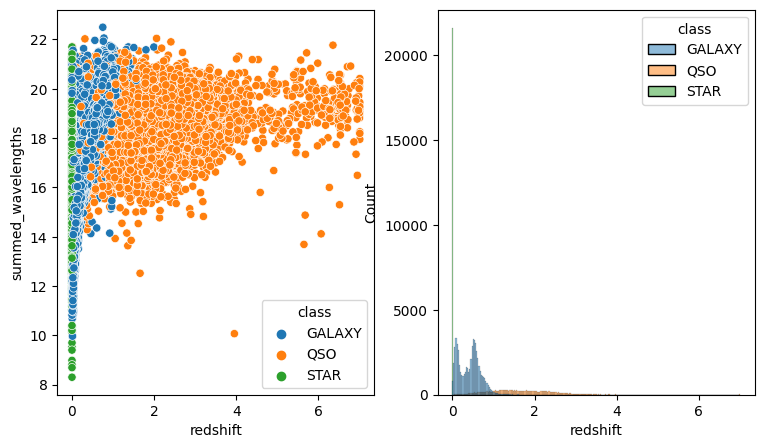

In [138]:
fig, axis = plt.subplots(ncols = 2, figsize = (9,5))
sns.scatterplot(df, y = "summed_wavelengths", x = "redshift", hue = "class", ax = axis[0])
sns.histplot(df, x = "redshift", hue = "class", ax = axis[1])

This scatter plot highlights how the redshift of a stellar object can provide some key insight as to what class the object is. Although the graph shows a much higher presence of high redshift QSOs, the histogram of redshift highlights the sheer amount of low redshift objects are recorded within this dataset. 

Text(0.5, 1.0, 'QSOs')

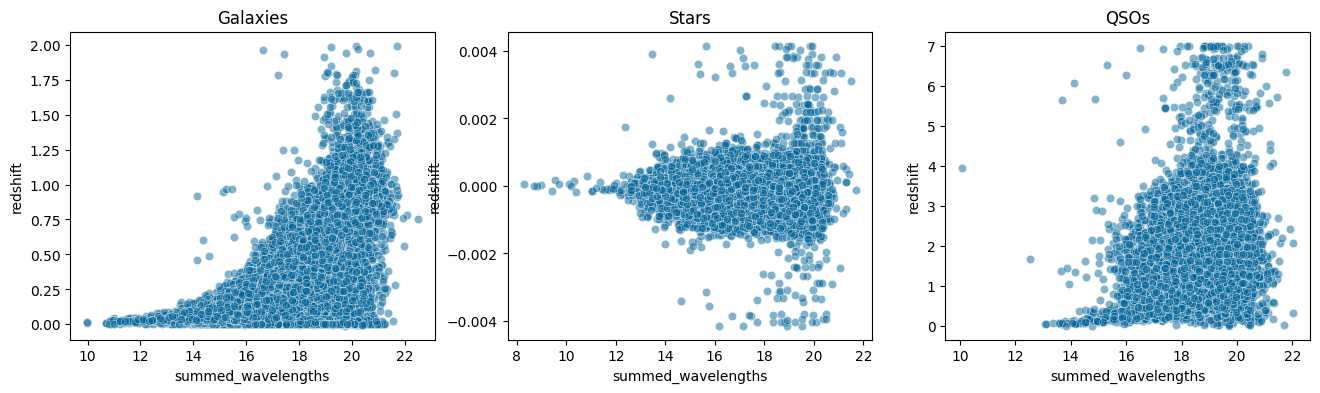

In [126]:
fig, axis = plt.subplots(ncols = 3, figsize = (16,4))
sns.scatterplot(df.loc[df["class"] == "GALAXY"], x = "summed_wavelengths", y = "redshift", ax = axis[0], color = "#05669b", alpha = 0.5)
sns.scatterplot(df.loc[df["class"] == "STAR"], x = "summed_wavelengths", y = "redshift", ax = axis[1], color = '#05669b', alpha = 0.5)
sns.scatterplot(df.loc[df["class"] == "QSO"], x = "summed_wavelengths", y = "redshift", ax = axis[2], color = '#05669b', alpha = 0.5)
axis[0].set_title("Galaxies")
axis[1].set_title("Stars")
axis[2].set_title("QSOs")


Breaking down the redshift per stellar class, we can see that each object within the survey tends to exist within it's own redshift constraints, which might fall to the physical limitations of the initial observation. Stars, having the lowest overall luminosity per object, are only seen in the survey at low distances, since at further distances, the SDSS might have not have the resolution to discern individual stars. Galaxies, being significantly larger than stars have a slightly larger upper limit to the distance within the data because they are significantly larger than stars, and thus can be resolved at much further distances. Quasars are someof the brightest objects in the night sky and as such, can be resolved at redshift values up to 7, which for references are some of the furthest objects in the universe. 

<Axes: xlabel='u', ylabel='z'>

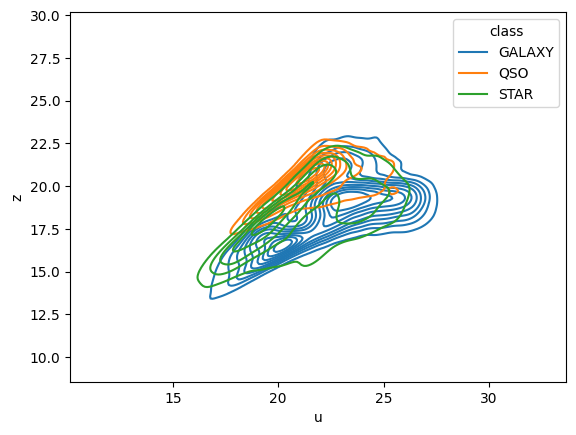

In [130]:
sns.kdeplot(data = df, x = "u", y = "z", hue = "class")

An analysis of only the wavelengths highlights the importance of the redshift value in the dataset in categorizing with each level. This plot demonstrates that while there is variation in the stellar groups when plotting opposite ends in the stellar spectra, redshift provides key information from the survey to create distinct levels. 

C:\Users\Abhay\AppData\Local\Temp\ipykernel_31244\3527599117.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=1, cmap = matplotlib.colors.ListedColormap(df["class"]))


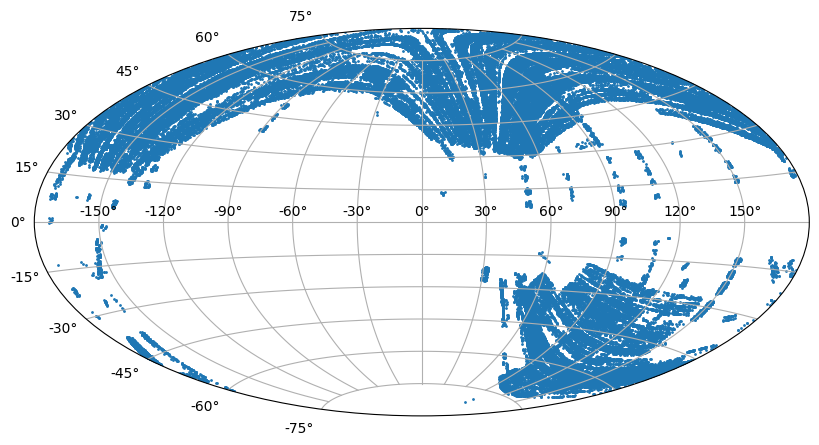

In [188]:
import matplotlib

eq = SkyCoord(df["alpha"], df["delta"], unit = u.deg)
gal = eq.galactic

plt.figure(figsize=(10,6))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(gal.l.wrap_at('180d').radian, gal.b.radian, s=1, cmap = matplotlib.colors.ListedColormap(df["class"]))

#still working on getting class colorings on this, I'm also suspect of the accuracy of the plot. 

Plotting the RA/Dec for each stellar object, we can see that the surveys done by SDSS do not encompass the entire sky, and instead have select portions of the night sky within each line of photos taken. 

<BarContainer object of 5 artists>

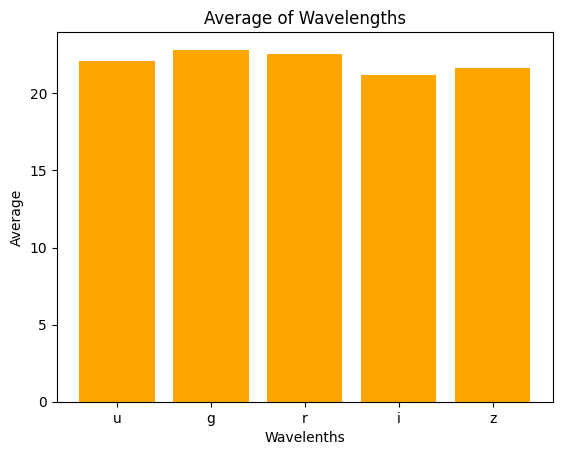

In [57]:
import matplotlib.pyplot as plt
#sns.histplot(df, x = "redshift", hue="class")
#avg = sum(float(df['u']))/len(float(df['u']))
#print(avg)
#countg = df.sum(g)
#label = ['u', 'g']
#plt.bar(df['u'], countg, label = label, width=0.8, color = ['red', 'green'] )
			
data = [22.080679, 22.83188, 22.58444, 21.16812, 21.61427 ]
wavelenths = ['u','g','r','i','z']
plt.xlabel('Wavelenths')
plt.ylabel('Average')
plt.title('Average of Wavelengths')
plt.bar(wavelenths, data, color = 'orange', width=0.8) 
